# Welcome
This is just a little testing thing for Python and Notebooks on GitHub, might do something interesting but I primarily just wanna demonstrate the rendering capabilities. 

- Markdown support, heck yeah
- Python support, thankfully
- Also some fun with NumPy and Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Example 1
This is just implementing a simple square function and then plots it to the screen with a linear space ranging from -5<=x<=5 with 100 datapoints. 

This also uses axis lines. 

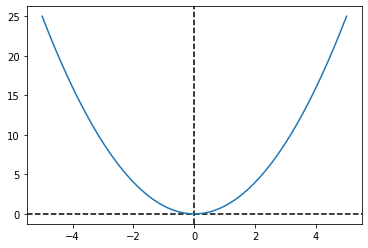

In [2]:
def f(x):
    return (x ** 2)

x = np.linspace(-5, 5)

plt.axhline(color="k", linestyle="--")
plt.axvline(color="k", linestyle="--")
plt.plot(x, f(x))

plt.show()

## Example 2
It's also possible with more complex functions, like trigonometry and then applying some type of exponent to them. 

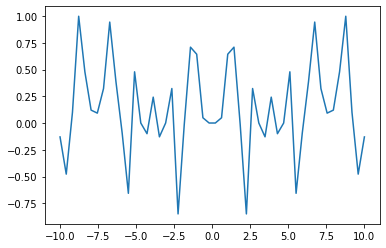

In [3]:
def f(x):
    return np.sin(x ** 2) ** 3

x = np.linspace(-10, 10)

plt.plot(x, f(x))

plt.show()

## Example 3
You can also throw in other types of datapoints, not just a linear space. Let's throw in some random y-values, too. 

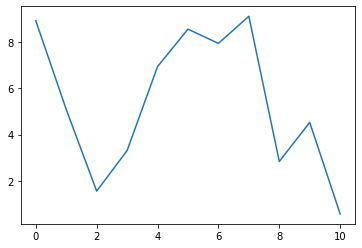

In [4]:
import random

x = np.array([i for i in range(0, 11)])
y = np.array([random.random() * 10 for _ in x])

plt.plot(x, y)

plt.show()

## Example 4
Here is an attempt at parametric equations and their graphs with an equalized axis scaling alongside different coloring and line style

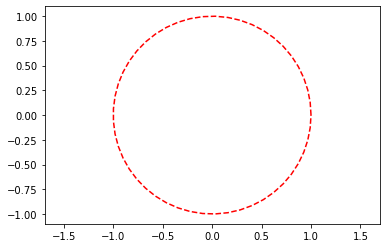

In [5]:
t = np.linspace(0, 2 * np.pi)

x = np.cos(t)
y = np.sin(t)

plt.axis("equal")
plt.plot(x, y, "r--")

plt.show()

## Example 5
Filling in a figure with some color
This fills in the Koch snowflake from [this link](https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py), example pulled right from there

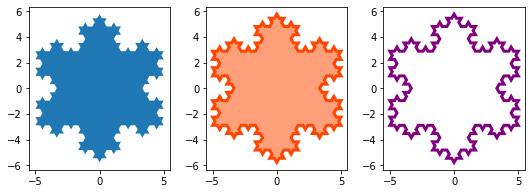

In [6]:

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

# Here's the actual rendering code
x, y = koch_snowflake(order=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

## Example 6
Some statistics using Pandas and Quandl. 

Quandl fetches stock market data and feed them into a Pandas Dataframe for easy processing. 
Pandas is a library for data processing and visualization that builds on NumPy and Matplotlib

In [8]:
import quandl
quandl.ApiConfig.api_key = ''

apple = quandl.get("WIKI/AAPL")
ms = quandl.get("WIKI/MSFT")

ms_price = ms[["Adj. Close"]]
apple_price = apple[["Adj. Close"]]
ms_price.rename(columns={"Adj. Close" : "MSFT"}, inplace=True)
apple_price.rename(columns={"Adj. Close" : "APPL"}, inplace=True)
both_stocks = ms_price.join(apple_price, how="inner")
both_stocks.plot()
plt.show()

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.